# 1 Preliminaries

## 1.0 Context

* About Seattle dataframe 
* Small démo of gargaml usage 

## 1.1 System

In [1]:
pwd

'/home/alex/gargaml/examples'

In [2]:
cd ..

/home/alex/gargaml


In [3]:
pwd

'/home/alex/gargaml'

In [4]:
ls

CHANGELOG.md  examples/  pyproject.toml    setup.py  utils/
docs/         gargaml/   README.md         src/
env/          LICENSE    requirements.txt  tests/


In [5]:
!uname -a

Linux asus2023 6.2.0-20-generic #20-Ubuntu SMP PREEMPT_DYNAMIC Thu Apr  6 07:48:48 UTC 2023 x86_64 x86_64 x86_64 GNU/Linux


In [6]:
!which python

/home/alex/gargaml/env/bin/python


## 1.2 Install

In [7]:
# if needed : 

# !pip install -r requirements.txt

In [8]:
# if needed : 

# !pip freeze > requirements.freeze

## 1.3 Import

In [9]:
# in one line : 

from gargaml import *

In [10]:
# or manually : 

# import random, os, sys, warnings, datetime, time, logging
# from IPython.display import display
# # pandarallel

# import pandas as pd
# import numpy as np

# import scipy as sp
# import scipy.stats as st

# import matplotlib.pyplot as plt
# import seaborn as sns
# import plotly.express as px
# from plotly.subplots import make_subplots
# import plotly.graph_objects as go
# import plotly.io as pio
# import missingno as msno


# from sklearn.base import *

# from sklearn.feature_selection import *
# from sklearn.feature_extraction import *
# from sklearn.preprocessing import *
# from sklearn.pipeline import *
# from sklearn.covariance import *
# from sklearn.decomposition import *
# from sklearn.model_selection import *
# from sklearn.impute import *
# from sklearn.metrics import *
# from sklearn.cluster import *
# from sklearn.compose import *

# from sklearn.dummy import *
# from sklearn.linear_model import *
# from sklearn.svm import *
# from sklearn.neighbors import *
# from sklearn.ensemble import *


# from imblearn.under_sampling import RandomUnderSampler
# from imblearn.pipeline import Pipeline

# from xgboost import XGBRegressor, XGBRFRegressor

# ...

## 1.4 Data

In [11]:
# all datasets avialable : 

Loads.list_all

['boston',
 'ames',
 'seattle',
 'hr',
 'titanic',
 'house',
 'mnist',
 'food',
 'wine',
 'iris',
 'fashion']

In [12]:
# seattle 2016 : 

df = Loads.seattle(year="2016")
df.head(2)

OSEBuildingID  DataYear    BuildingType PrimaryPropertyType   
0              1      2016  NonResidential               Hotel  \
1              2      2016  NonResidential               Hotel   

           PropertyName          Address     City State  ZipCode   
0  Mayflower park hotel    405 Olive way  Seattle    WA  98101.0  \
1       Paramount Hotel  724 Pine street  Seattle    WA  98101.0   

  TaxParcelIdentificationNumber  ...  Electricity(kWh) Electricity(kBtu)   
0                    0659000030  ...      1.156514e+06         3946027.0  \
1                    0659000220  ...      9.504252e+05         3242851.0   

   NaturalGas(therms)  NaturalGas(kBtu)  DefaultData  Comments   
0         12764.52930         1276453.0        False       NaN  \
1         51450.81641         5145082.0        False       NaN   

   ComplianceStatus  Outlier  TotalGHGEmissions  GHGEmissionsIntensity  
0         Compliant      NaN             249.98                   2.83  
1         Compliant      NaN             295.86                   2.86  

[2 rows x 46 columns]

## 1.5 Options and Graphics 

In [13]:
# boot seaborn  : 

sns.set()

In [14]:
# usefull consts : 

DISPLAY = True
FRAC = 1.0
LAZY = False

In [15]:
# warning messages : 

warnings.filterwarnings(action="once")

# or : 
# warnings.filterwarnings('ignore')


In [16]:
# if png and not fancy graphs with plotly : 

# pio.renderers.default = "png"

## 1.6 Third parties and utils

In [17]:
# placeholder

## 1.7 Functions and class

In [18]:
# placeholder

# 2 First Tour

## 2.0 Pre-cleaning

In [19]:
# about columns quality : 

df.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'Address', 'City', 'State', 'ZipCode',
       'TaxParcelIdentificationNumber', 'CouncilDistrictCode', 'Neighborhood',
       'Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'DefaultData', 'Comments', 'ComplianceStatus',
       'Outlier

In [20]:
# clean columns : 

def clean(txt):
    txt = txt.lower().strip()
    replace = [
        ("(s)", ""),
        ("(", "_"),
        (")", ""),
        ("/", "_"),
        ("__", "_"),
    ]

    for k, v in replace:
        txt = txt.replace(k, v)

    txt = txt.lower().strip()
    return txt


df.columns = map(clean, df.columns)
df.columns

Index(['osebuildingid', 'datayear', 'buildingtype', 'primarypropertytype',
       'propertyname', 'address', 'city', 'state', 'zipcode',
       'taxparcelidentificationnumber', 'councildistrictcode', 'neighborhood',
       'latitude', 'longitude', 'yearbuilt', 'numberofbuildings',
       'numberoffloors', 'propertygfatotal', 'propertygfaparking',
       'propertygfabuilding', 'listofallpropertyusetypes',
       'largestpropertyusetype', 'largestpropertyusetypegfa',
       'secondlargestpropertyusetype', 'secondlargestpropertyusetypegfa',
       'thirdlargestpropertyusetype', 'thirdlargestpropertyusetypegfa',
       'yearsenergystarcertified', 'energystarscore', 'siteeui_kbtu_sf',
       'siteeuiwn_kbtu_sf', 'sourceeui_kbtu_sf', 'sourceeuiwn_kbtu_sf',
       'siteenergyuse_kbtu', 'siteenergyusewn_kbtu', 'steamuse_kbtu',
       'electricity_kwh', 'electricity_kbtu', 'naturalgas_therms',
       'naturalgas_kbtu', 'defaultdata', 'comments', 'compliancestatus',
       'outlier', 'totalghgem

In [21]:
# recast osebuildingid : 

df.osebuildingid = df.osebuildingid.astype(str)
df.head(2)

osebuildingid  datayear    buildingtype primarypropertytype   
0             1      2016  NonResidential               Hotel  \
1             2      2016  NonResidential               Hotel   

           propertyname          address     city state  zipcode   
0  Mayflower park hotel    405 Olive way  Seattle    WA  98101.0  \
1       Paramount Hotel  724 Pine street  Seattle    WA  98101.0   

  taxparcelidentificationnumber  ...  electricity_kwh electricity_kbtu   
0                    0659000030  ...     1.156514e+06        3946027.0  \
1                    0659000220  ...     9.504252e+05        3242851.0   

   naturalgas_therms  naturalgas_kbtu  defaultdata  comments   
0        12764.52930        1276453.0        False       NaN  \
1        51450.81641        5145082.0        False       NaN   

   compliancestatus  outlier  totalghgemissions  ghgemissionsintensity  
0         Compliant      NaN             249.98                   2.83  
1         Compliant      NaN             295.86                   2.86  

[2 rows x 46 columns]

In [22]:
# select columns for faster and better analysis 


cols = ['osebuildingid',  'buildingtype', 'primarypropertytype',
       'propertyname', 'address',  'neighborhood',
       'latitude', 'longitude', 'yearbuilt', 'numberofbuildings',
       'numberoffloors', 'propertygfatotal', 'propertygfaparking',
       'propertygfabuilding', 'listofallpropertyusetypes',
       'largestpropertyusetype', 'largestpropertyusetypegfa',
       'secondlargestpropertyusetype', 'secondlargestpropertyusetypegfa',
       'thirdlargestpropertyusetype', 'thirdlargestpropertyusetypegfa',
       'yearsenergystarcertified', 'energystarscore', 
       'siteenergyuse_kbtu',  'defaultdata', 'compliancestatus',
       'outlier',]


df =df.loc[:, cols]
df.head(3)

osebuildingid    buildingtype primarypropertytype             propertyname   
0             1  NonResidential               Hotel     Mayflower park hotel  \
1             2  NonResidential               Hotel          Paramount Hotel   
2             3  NonResidential               Hotel  5673-The Westin Seattle   

           address neighborhood  latitude  longitude  yearbuilt   
0    405 Olive way     DOWNTOWN  47.61220 -122.33799       1927  \
1  724 Pine street     DOWNTOWN  47.61317 -122.33393       1996   
2  1900 5th Avenue     DOWNTOWN  47.61393 -122.33810       1969   

   numberofbuildings  ...  secondlargestpropertyusetype   
0                1.0  ...                           NaN  \
1                1.0  ...                       Parking   
2                1.0  ...                           NaN   

   secondlargestpropertyusetypegfa  thirdlargestpropertyusetype   
0                              NaN                          NaN  \
1                          15064.0                   Restaurant   
2                              NaN                          NaN   

   thirdlargestpropertyusetypegfa yearsenergystarcertified energystarscore   
0                             NaN                      NaN            60.0  \
1                          4622.0                      NaN            61.0   
2                             NaN                      NaN            43.0   

   siteenergyuse_kbtu defaultdata  compliancestatus outlier  
0           7226362.5       False         Compliant     NaN  
1           8387933.0       False         Compliant     NaN  
2          72587024.0       False         Compliant     NaN  

[3 rows x 27 columns]

## 2.1 Display

In [23]:
# display df : 

EDA.first_tour.display(df)

----HEAD ---- osebuildingid    buildingtype primarypropertytype   
0                         1  NonResidential               Hotel  \
1                         2  NonResidential               Hotel   
2                         3  NonResidential               Hotel   
3                         5  NonResidential               Hotel   
4                         8  NonResidential               Hotel   

----HEAD ----                 propertyname          address neighborhood   
0                     Mayflower park hotel    405 Olive way     DOWNTOWN  \
1                          Paramount Hotel  724 Pine street     DOWNTOWN   
2                  5673-The Westin Seattle  1900 5th Avenue     DOWNTOWN   
3                                HOTEL MAX   620 STEWART ST     DOWNTOWN   
4              WARWICK SEATTLE HOTEL (ID8)    401 LENORA ST     DOWNTOWN   

----HEAD ----  latitude  longitude  yearbuilt  numberofbuildings  ...   
0              47.61220 -122.33799       1927                1.0  ...  \
1              47.61317 -122.33393       1996                1.0  ...   
2              47.61393 -122.33810       1969                1.0  ...   
3              47.61412 -122.33664       1926                1.0  ...   
4              47.61375 -122.34047       1980                1.0  ...   

----HEAD ----  secondlargestpropertyusetype  secondlargestpropertyusetypegfa   
0                                       NaN                              NaN  \
1                                   Parking                          15064.0   
2                                       NaN                              NaN   
3                                       NaN                              NaN   
4                                   Parking                          68009.0   

----HEAD ----  thirdlargestpropertyusetype  thirdlargestpropertyusetypegfa   
0                                      NaN                             NaN  \
1                               Restaurant                          4622.0   
2                                      NaN                             NaN   
3                                      NaN                             NaN   
4                            Swimming Pool                             0.0   

----HEAD ---- yearsenergystarcertified energystarscore  siteenergyuse_kbtu   
0                                  NaN            60.0           7226362.5  \
1                                  NaN            61.0           8387933.0   
2                                  NaN            43.0          72587024.0   
3                                  NaN            56.0           6794584.0   
4                                  NaN            75.0          14172606.0   

----HEAD ---- defaultdata  compliancestatus outlier  
0                   False         Compliant     NaN  
1                   False         Compliant     NaN  
2                   False         Compliant     NaN  
3                   False         Compliant     NaN  
4                   False         Compliant     NaN  

[5 rows x 27 columns]

----SAMP ---- osebuildingid          buildingtype   
55                       70        NonResidential  \
1646                  22958  Multifamily LR (1-4)   
1418                  21741        NonResidential   
1262                  21380    Nonresidential COS   
2400                  25530  Multifamily MR (5-9)   
194                     314        NonResidential   
3133                  40067        NonResidential   
762                   19808  Multifamily MR (5-9)   
959                   20360  Multifamily LR (1-4)   
1477                  21937  Multifamily LR (1-4)   

----SAMP ----          primarypropertytype   
55                                   Hotel  \
1646                  Low-Rise Multifamily   
1418                 Senior Care Community   
1262           Small- and Mid-Sized Office   
2400                  Mid-Rise Multifamily   
194                                  Hotel   
3133           Small- and Mid-Sized Office   
762                   Mid-Rise Multifamily   
959                   Low-Rise Multifamily   
1477                  Low-Rise Multifamily   

----SAMP ----                                propertyname   
55             Homewood Suites by Hilton Seattle Downtonw  \
1646                      The Town and Country Apartments   
1418                                    Mirabella Seattle   
1262                             System Operations Center   
2400                                         Water's Edge   
194                                     Edgewater Seattle   
3133                                        Olympic Block   
762                            Arcadian Court Condominium   
959                                        Cinnamon Ridge   
1477                                     Fini Condominium   

----SAMP ----                 address           neighborhood  latitude   
55               206 Western Ave West  MAGNOLIA / QUEEN ANNE  47.62023  \
1646           12340 Roosevelt Way NE                  North  47.71894   
1418             116 Fairview Ave. N.             LAKE UNION  47.61935   
1262                   614 NW 46th St                Ballard  47.66256   
2400               9530 Rainier Ave S              SOUTHEAST  47.52058   
194                  2411 Alaskan Way               DOWNTOWN  47.61240   
3133                   101 Yesler Way               DOWNTOWN  47.60148   
762                  511 E Roy Street                   EAST  47.62483   
959            6910 California Ave SW              SOUTHWEST  47.54192   
1477             6801 Greenwood Ave N              NORTHWEST  47.67888   

----SAMP ----  longitude  yearbuilt  numberofbuildings  ...   
55            -122.35951       1998                1.0  ...  \
1646          -122.31769       1963                1.0  ...   
1418          -122.33389       2006                1.0  ...   
1262          -122.36483       1993                1.0  ...   
2400          -122.26028       1964                1.0  ...   
194           -122.35075       1961                1.0  ...   
3133          -122.33379       1985                1.0  ...   
762           -122.32508       1980                1.0  ...   
959           -122.38682       1985                1.0  ...   
1477          -122.35563       2007                1.0  ...   

----SAMP ----  secondlargestpropertyusetype  secondlargestpropertyusetypegfa   
55                                      NaN                              NaN  \
1646                                Parking                              0.0   
1418                                    NaN                              NaN   
1262                                  Other                           6060.0   
2400                                    NaN                              NaN   
194                                     NaN                              NaN   
3133                                Parking                          18364.0   
762                                     NaN                              NaN   
959     

----TAIL ---- osebuildingid        buildingtype primarypropertytype   
3371                  50222  Nonresidential COS              Office  \
3372                  50223  Nonresidential COS               Other   
3373                  50224  Nonresidential COS               Other   
3374                  50225  Nonresidential COS  Mixed Use Property   
3375                  50226  Nonresidential COS  Mixed Use Property   

----TAIL ----                         propertyname           address   
3371                         Horticulture building  1600 S Dakota St  \
3372           International district/Chinatown CC     719 8th Ave S   
3373                               Queen Anne Pool    1920 1st Ave W   
3374                   South Park Community Center    8319 8th Ave S   
3375                   Van Asselt Community Center  2820 S Myrtle St   

----TAIL ----           neighborhood  latitude  longitude  yearbuilt   
3371                GREATER DUWAMISH  47.56722 -122.31154       1990  \
3372                        DOWNTOWN  47.59625 -122.32283       2004   
3373           MAGNOLIA / QUEEN ANNE  47.63644 -122.35784       1974   
3374                GREATER DUWAMISH  47.52832 -122.32431       1989   
3375                GREATER DUWAMISH  47.53939 -122.29536       1938   

----TAIL ----  numberofbuildings  ...    secondlargestpropertyusetype   
3371                         1.0  ...                             NaN  \
3372                         1.0  ...                             NaN   
3373                         1.0  ...  Fitness Center/Health Club/Gym   
3374                         1.0  ...  Fitness Center/Health Club/Gym   
3375                         1.0  ...  Fitness Center/Health Club/Gym   

----TAIL ----  secondlargestpropertyusetypegfa  thirdlargestpropertyusetype   
3371                                       NaN                          NaN  \
3372                                       NaN                          NaN   
3373                                    5574.0                Swimming Pool   
3374                                    6501.0           Pre-school/Daycare   
3375                                    8000.0           Pre-school/Daycare   

----TAIL ----  thirdlargestpropertyusetypegfa yearsenergystarcertified   
3371                                      NaN                      NaN  \
3372                                      NaN                      NaN   
3373                                      0.0                      NaN   
3374                                    484.0                      NaN   
3375                                   1108.0                      NaN   

----TAIL ---- energystarscore  siteenergyuse_kbtu defaultdata   
3371                     46.0        8.497457e+05        True  \
3372                      NaN        9.502762e+05       False   
3373                      NaN        5.765898e+06       False   
3374                      NaN        7.194712e+05       False   
3375                      NaN        1.152896e+06       False   

----TAIL ----              compliancestatus outlier  
3371           Error - Correct Default Data     NaN  
3372                              Compliant     NaN  
3373                              Compliant     NaN  
3374                              Compliant     NaN  
3375                              Compliant     NaN  

[5 rows x 27 columns]

## 2.2 Structure

In [24]:
# info :

EDA.first_tour.info(df)

'shape (3376, 27), memory 0.71MB'

'---- FLO ----'

cols    types  nan_sum  nan_mean  uniq_sum   
0                         latitude  float64        0      0.00      2876  \
1                        longitude  float64        0      0.00      2656   
2                numberofbuildings  float64        8      0.00        17   
3        largestpropertyusetypegfa  float64       20      0.01      3122   
4  secondlargestpropertyusetypegfa  float64     1697      0.50      1352   
5   thirdlargestpropertyusetypegfa  float64     2780      0.82       501   
6                  energystarscore  float64      843      0.25       100   
7               siteenergyuse_kbtu  float64        5      0.00      3354   

   uniq_rate  is_sku  
0       0.85   False  
1       0.79   False  
2       0.01   False  
3       0.92   False  
4       0.40   False  
5       0.15   False  
6       0.03   False  
7       0.99   False

'---- INT ----'

cols  types  nan_sum  nan_mean  uniq_sum  uniq_rate  is_sku
0            yearbuilt  int64        0       0.0       113       0.03   False
1       numberoffloors  int64        0       0.0        50       0.01   False
2     propertygfatotal  int64        0       0.0      3195       0.95   False
3   propertygfaparking  int64        0       0.0       496       0.15   False
4  propertygfabuilding  int64        0       0.0      3193       0.95   False

'---- BOO ----'

cols types  nan_sum  nan_mean  uniq_sum  uniq_rate  is_sku
0  defaultdata  bool        0       0.0         2        0.0   False

'---- OBJ ----'

cols   types  nan_sum  nan_mean  uniq_sum   
0                  osebuildingid  object        0      0.00      3376  \
1                   buildingtype  object        0      0.00         8   
2            primarypropertytype  object        0      0.00        24   
3                   propertyname  object        0      0.00      3362   
4                        address  object        0      0.00      3354   
5                   neighborhood  object        0      0.00        19   
6      listofallpropertyusetypes  object        9      0.00       466   
7         largestpropertyusetype  object       20      0.01        56   
8   secondlargestpropertyusetype  object     1697      0.50        50   
9    thirdlargestpropertyusetype  object     2780      0.82        44   
10      yearsenergystarcertified  object     3257      0.96        65   
11              compliancestatus  object        0      0.00         4   
12                       outlier  object     3344      0.99         2   

    uniq_rate  is_sku  
0        1.00    True  
1        0.00   False  
2        0.01   False  
3        1.00   False  
4        0.99   False  
5        0.01   False  
6        0.14   False  
7        0.02   False  
8        0.01   False  
9        0.01   False  
10       0.02   False  
11       0.00   False  
12       0.00   False

In [25]:
# usefull dtype info : 

df.dtypes.value_counts()

object     13
float64     8
int64       5
bool        1
Name: count, dtype: int64

## 2.3 NaN and duplicated

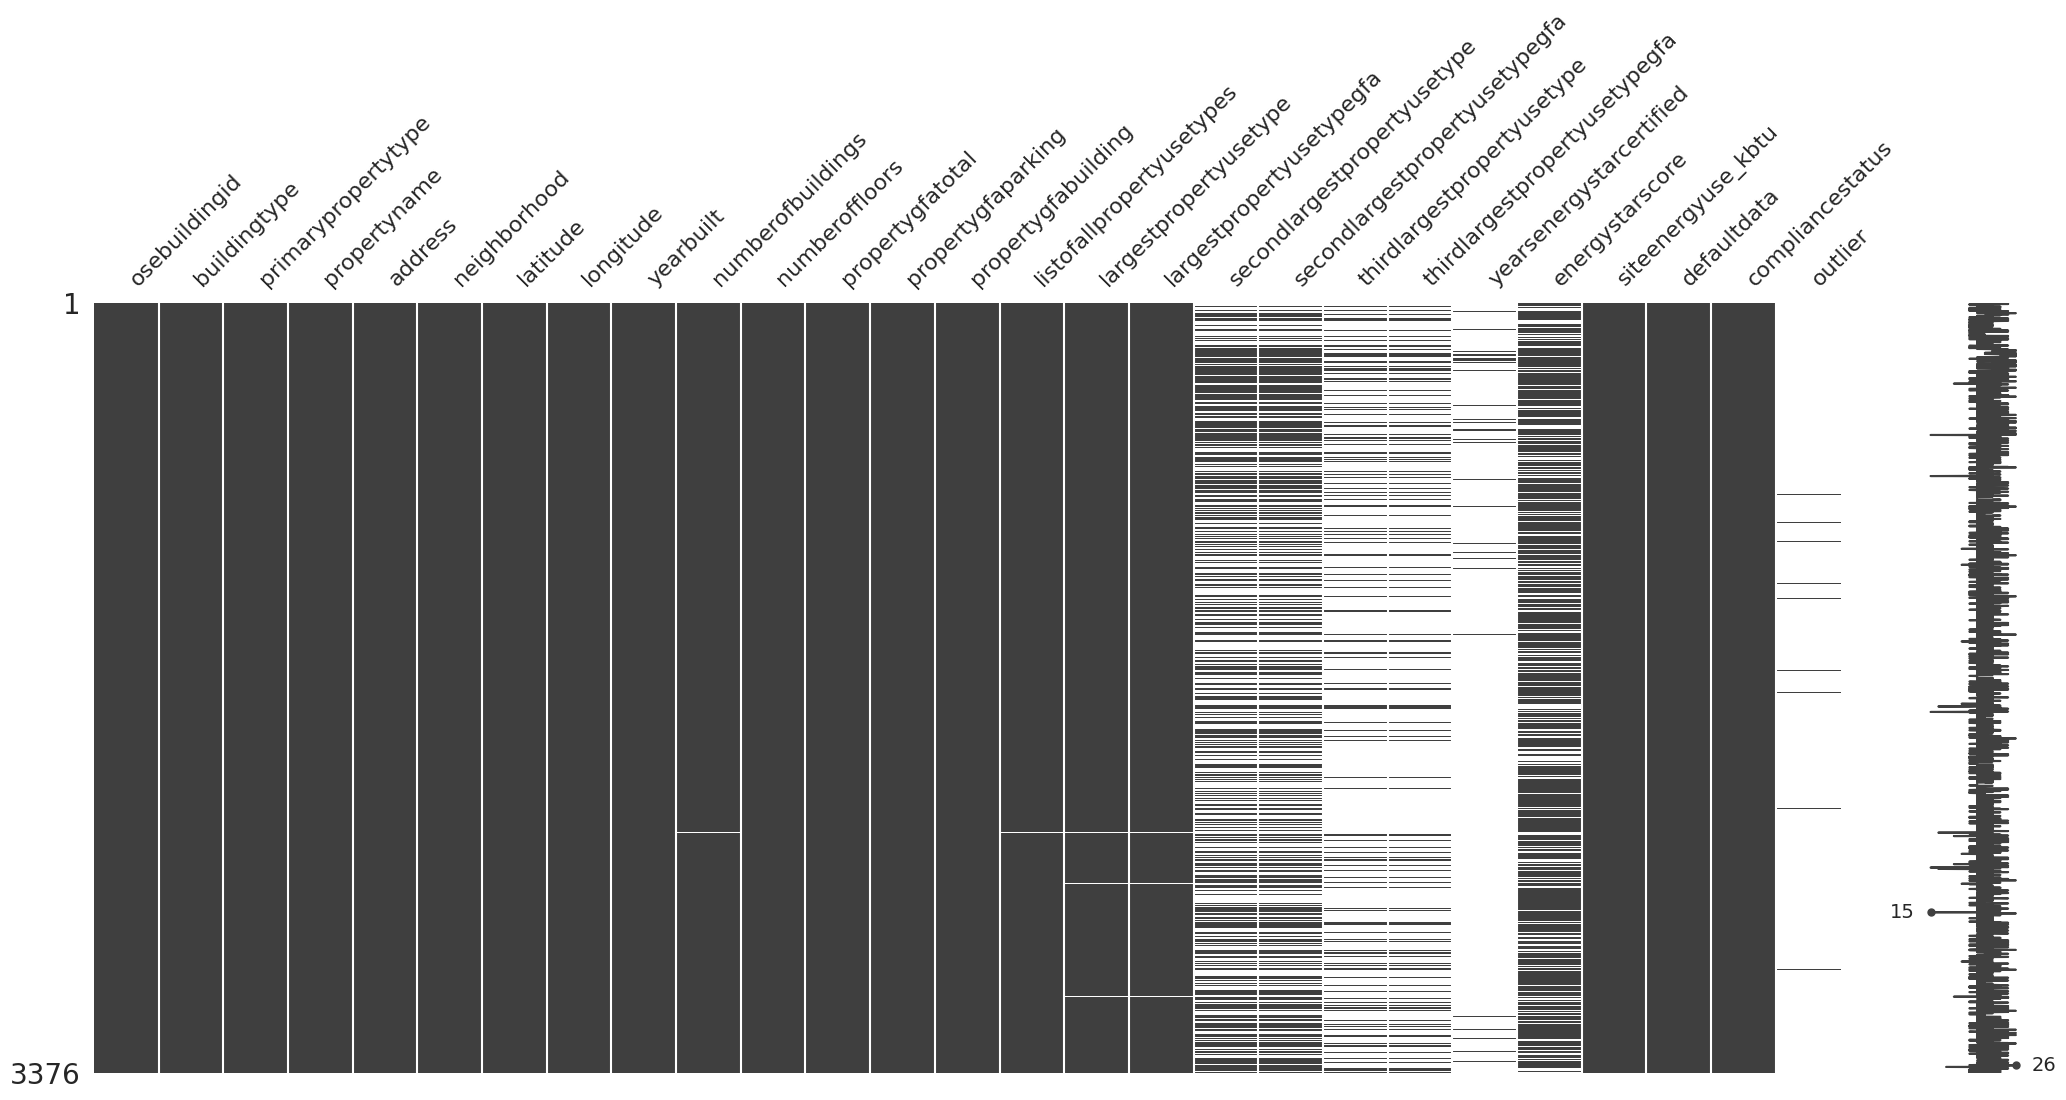

In [26]:
# mnso : 

EDA.nan.viz(df)

In [27]:
# nan rate by columns : 

EDA.nan.rate(df)

outlier                            0.991
yearsenergystarcertified           0.965
thirdlargestpropertyusetypegfa     0.823
thirdlargestpropertyusetype        0.823
secondlargestpropertyusetypegfa    0.503
secondlargestpropertyusetype       0.503
energystarscore                    0.250
largestpropertyusetypegfa          0.006
largestpropertyusetype             0.006
listofallpropertyusetypes          0.003
numberofbuildings                  0.002
siteenergyuse_kbtu                 0.001
compliancestatus                   0.000
defaultdata                        0.000
osebuildingid                      0.000
buildingtype                       0.000
propertygfaparking                 0.000
propertygfatotal                   0.000
numberoffloors                     0.000
yearbuilt                          0.000
longitude                          0.000
latitude                           0.000
neighborhood                       0.000
address                            0.000
propertyname    

In [28]:
# filter on poor columns : 

EDA.nan.rate(df, threshold=0.75)

outlier                           0.991
yearsenergystarcertified          0.965
thirdlargestpropertyusetypegfa    0.823
thirdlargestpropertyusetype       0.823
dtype: float64

In [29]:
# same for lines : 

EDA.nan.rate(df, axis=1, threshold=0.5)

Series([], dtype: float64)

In [30]:
# about nan distribution by column : 

EDA.nan.rate(df, axis=1, threshold=0.0).value_counts(normalize=True).round(2)

0.222    0.40
0.148    0.24
0.111    0.11
0.259    0.08
0.185    0.08
0.074    0.07
0.037    0.02
0.296    0.00
0.444    0.00
0.333    0.00
0.407    0.00
0.370    0.00
Name: proportion, dtype: float64

In [31]:
# duplicated : 

df.duplicated().sum()

0

In [32]:
# with subset : 

df.duplicated(subset="osebuildingid").sum()

0

## 2.4 Data Inspection

In [33]:
# describe per type : 

EDA.first_tour.describe(df)

---- FLO ----  latitude  longitude  numberofbuildings   
count           3376.00    3376.00            3368.00  \
mean              47.62    -122.33               1.11   
std                0.05       0.03               2.11   
min               47.50    -122.41               0.00   
25%               47.60    -122.35               1.00   
50%               47.62    -122.33               1.00   
75%               47.66    -122.32               1.00   
max               47.73    -122.22             111.00   

---- FLO ----  largestpropertyusetypegfa  secondlargestpropertyusetypegfa   
count                            3356.00                          1679.00  \
mean                            79177.64                         28444.08   
std                            201703.41                         54392.92   
min                              5656.00                             0.00   
25%                             25094.75                          5000.00   
50%                             39894.00                         10664.00   
75%                             76200.25                         26640.00   
max                           9320156.00                        686750.00   

---- FLO ----  thirdlargestpropertyusetypegfa  energystarscore   
count                                  596.00          2533.00  \
mean                                 11738.68            67.92   
std                                  29331.20            26.87   
min                                      0.00             1.00   
25%                                   2239.00            53.00   
50%                                   5043.00            75.00   
75%                                  10138.75            90.00   
max                                 459748.00           100.00   

---- FLO ----  siteenergyuse_kbtu  
count                3.371000e+03  
mean                 5.403667e+06  
std                  2.161063e+07  
min                  0.000000e+00  
25%                  9.251286e+05  
50%                  1.803753e+06  
75%                  4.222455e+06  
max                  8.739237e+08

---- INT ----  yearbuilt  numberoffloors  propertygfatotal   
count            3376.00         3376.00           3376.00  \
mean             1968.57            4.71          94833.54   
std                33.09            5.49         218837.61   
min              1900.00            0.00          11285.00   
25%              1948.00            2.00          28487.00   
50%              1975.00            4.00          44175.00   
75%              1997.00            5.00          90992.00   
max              2015.00           99.00        9320156.00   

---- INT ----  propertygfaparking  propertygfabuilding  
count                     3376.00              3376.00  
mean                      8001.53             86832.01  
std                      32326.72            207939.81  
min                          0.00              3636.00  
25%                          0.00             27756.00  
50%                          0.00             43216.00  
75%                          0.00             84276.25  
max                     512608.00           9320156.00

---- BOO ---- defaultdata
count                3376
unique                  2
top                 False
freq                 3263

---- OBJ ---- osebuildingid    buildingtype   primarypropertytype   
count                  3376            3376                  3376  \
unique                 3376               8                    24   
top                       1  NonResidential  Low-Rise Multifamily   
freq                      1            1460                   987   

---- OBJ ----     propertyname            address neighborhood   
count                     3376               3376         3376  \
unique                    3362               3354           19   
top            Northgate Plaza  2600 SW Barton St     DOWNTOWN   
freq                         3                  4          573   

---- OBJ ---- listofallpropertyusetypes largestpropertyusetype   
count                              3367                   3356  \
unique                              466                     56   
top                 Multifamily Housing    Multifamily Housing   
freq                                866                   1667   

---- OBJ ---- secondlargestpropertyusetype thirdlargestpropertyusetype   
count                                 1679                         596  \
unique                                  50                          44   
top                                Parking                Retail Store   
freq                                   976                         110   

---- OBJ ---- yearsenergystarcertified compliancestatus      outlier  
count                              119             3376           32  
unique                              65                4            2  
top                               2016        Compliant  Low outlier  
freq                                14             3211           23

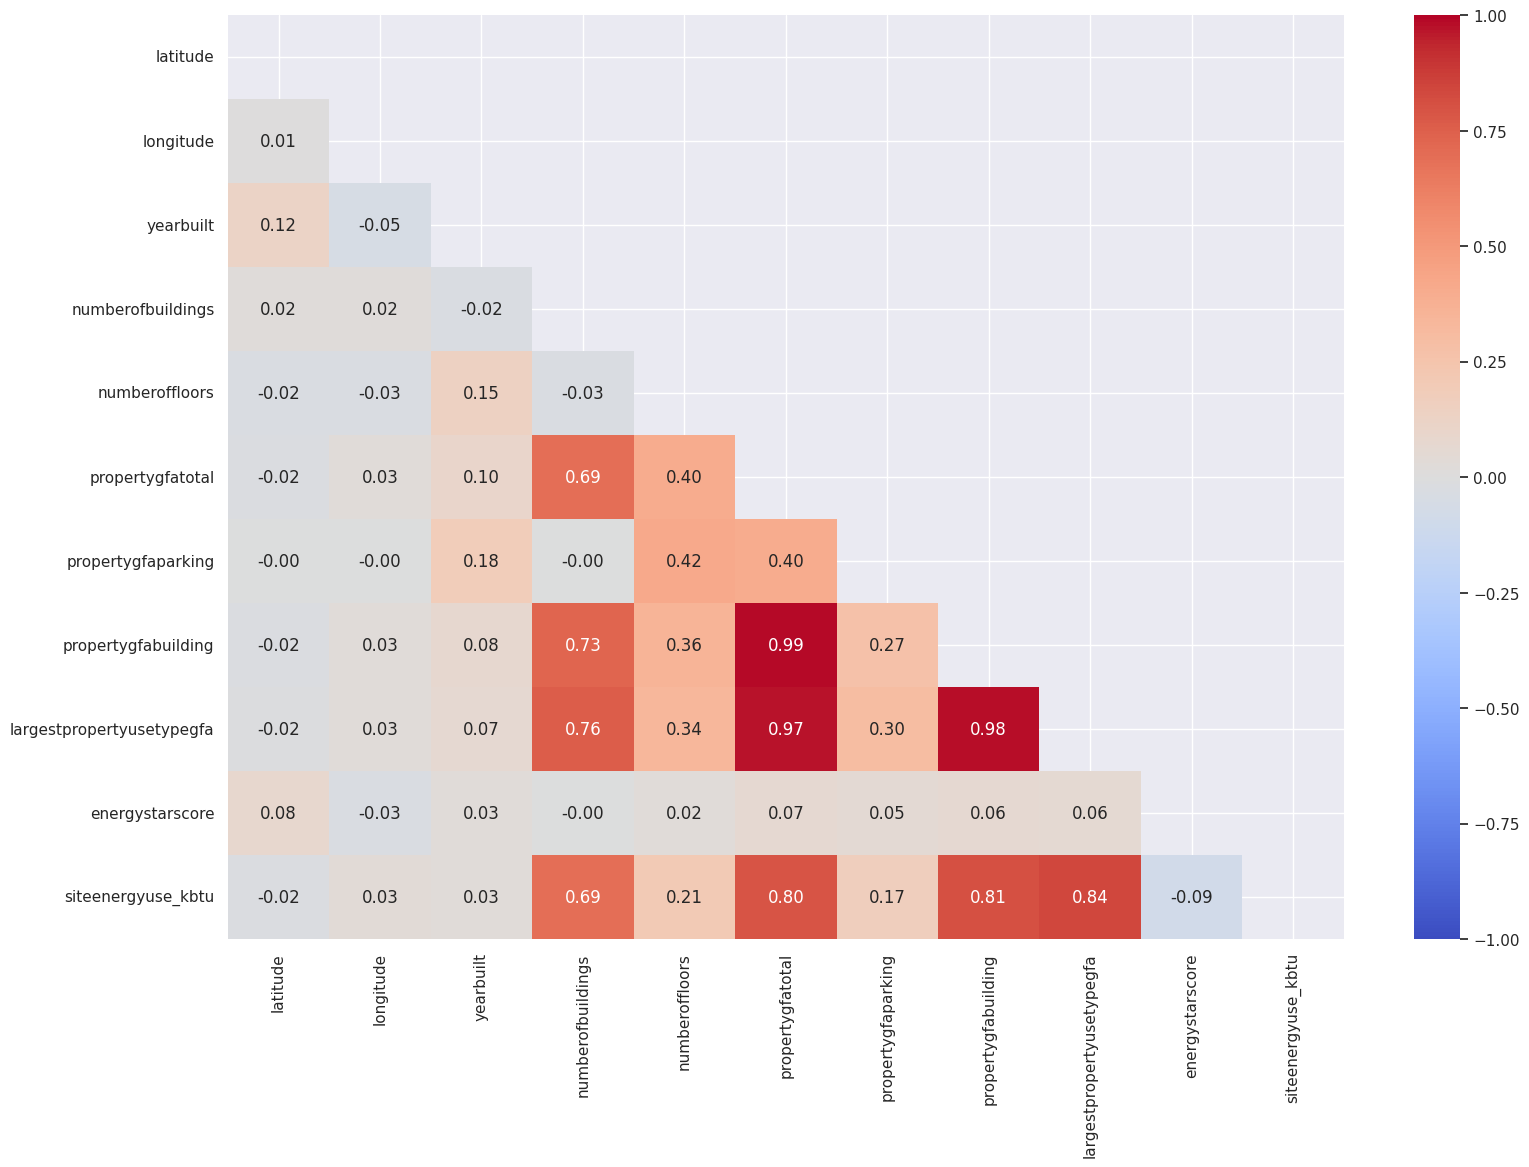

In [34]:
# global correlation : 

_ = EDA.study.corr(df)

In [35]:
# about distribution : 

EDA.study.skew(df)

col  raw_skew  log1p  log_skew  gain
0                    latitude      0.14      1      0.14  0.02
1                   longitude     -0.14      0     -0.14 -0.00
2                   yearbuilt     -0.54      1     -0.56 -0.04
3           numberofbuildings     43.45      1      5.09  0.88
4              numberoffloors      5.92      1      0.83  0.86
5            propertygfatotal     24.13      1      1.15  0.95
6          propertygfaparking      6.65      1      2.04  0.69
7         propertygfabuilding     27.62      1      1.17  0.96
8   largestpropertyusetypegfa     30.17      1      1.03  0.97
9             energystarscore     -0.76      1     -2.83 -2.74
10         siteenergyuse_kbtu     24.86      1     -3.86  1.16

In [36]:
# pairplot :
# WARNING : very long computation, avoid if possible else uncomment 

# frac = 0.05
# sns.pairplot(df.sample(frac=frac), corner=True)

In [37]:
# about outliers : 

EDA.study.outlier(df)

/home/alex/gargaml/env/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:184: RuntimeWarning:

Determinant has increased; this should not happen: log(det) > log(previous_det) (57.610206373670152 > 57.051546072824436). You may want to try with a higher value of support_fraction (current value: 0.503).

/home/alex/gargaml/env/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:184: RuntimeWarning:

Determinant has increased; this should not happen: log(det) > log(previous_det) (54.123078750585677 > 31.097402198775637). You may want to try with a higher value of support_fraction (current value: 0.503).

/home/alex/gargaml/env/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:184: RuntimeWarning:

Determinant has increased; this should not happen: log(det) > log(previous_det) (59.424193661922033 > 58.149823147164540). You may want to try with a higher value of support_fraction (current value: 0.502).

/home/alex/gargaml/env/lib/python3

'shape Original : 3376 shape_cleaned 3038 => loss 0.1'

'--------- ORIGINAL ----------'

latitude  longitude  yearbuilt  numberofbuildings  numberoffloors   
count   3376.00    3376.00    3376.00            3376.00         3376.00  \
mean      47.62    -122.33    1968.57               1.11            4.71   
std        0.05       0.03      33.09               2.11            5.49   
min       47.50    -122.41    1900.00               0.00            0.00   
25%       47.60    -122.35    1948.00               1.00            2.00   
50%       47.62    -122.33    1975.00               1.00            4.00   
75%       47.66    -122.32    1997.00               1.00            5.00   
max       47.73    -122.22    2015.00             111.00           99.00   

       propertygfatotal  propertygfaparking  propertygfabuilding   
count           3376.00             3376.00              3376.00  \
mean           94833.54             8001.53             86832.01   
std           218837.61            32326.72            207939.81   
min            11285.00                0.00              3636.00   
25%            28487.00                0.00             27756.00   
50%            44175.00                0.00             43216.00   
75%            90992.00                0.00             84276.25   
max          9320156.00           512608.00           9320156.00   

       largestpropertyusetypegfa  energystarscore  siteenergyuse_kbtu  
count                    3376.00          3376.00        3.376000e+03  
mean                    78958.76            66.94        5.397784e+06  
std                    201137.74            25.00        2.159517e+07  
min                      5656.00             1.00        0.000000e+00  
25%                     25094.75            52.00        9.252109e+05  
50%                     39867.50            72.00        1.802373e+06  
75%                     75661.25            87.00        4.218227e+06  
max                   9320156.00           100.00        8.739237e+08

'--------- CLEANED ----------'

latitude  longitude  yearbuilt  numberofbuildings  numberoffloors   
count   3038.00    3038.00    3038.00            3038.00         3038.00  \
mean      47.62    -122.33    1966.29               1.04            3.98   
std        0.05       0.03      33.15               0.57            3.22   
min       47.50    -122.41    1900.00               0.00            0.00   
25%       47.60    -122.35    1940.00               1.00            2.00   
50%       47.62    -122.33    1970.00               1.00            3.00   
75%       47.66    -122.32    1993.00               1.00            5.00   
max       47.73    -122.22    2015.00              16.00           42.00   

       propertygfatotal  propertygfaparking  propertygfabuilding   
count           3038.00             3038.00              3038.00  \
mean           61447.72              978.36             60469.36   
std            57717.26             3811.78             57657.79   
min            11285.00                0.00             10925.00   
25%            27322.00                0.00             26529.00   
50%            40395.00                0.00             39634.00   
75%            69238.50                0.00             66896.25   
max           435501.00            26640.00            435501.00   

       largestpropertyusetypegfa  energystarscore  siteenergyuse_kbtu  
count                    3038.00          3038.00             3038.00  
mean                    53693.78            66.86          2801788.10  
std                     51132.79            24.73          3413875.45  
min                      5656.00             1.00                0.00  
25%                     24288.00            52.00           866915.12  
50%                     35796.00            72.00          1586921.75  
75%                     60498.25            87.00          3161526.75  
max                    432903.00           100.00         25747022.00

osebuildingid        buildingtype primarypropertytype   
0                1      NonResidential               Hotel  \
1                2      NonResidential               Hotel   
2                3      NonResidential               Hotel   
3                5      NonResidential               Hotel   
4                8      NonResidential               Hotel   
...            ...                 ...                 ...   
3371         50222  Nonresidential COS              Office   
3372         50223  Nonresidential COS               Other   
3373         50224  Nonresidential COS               Other   
3374         50225  Nonresidential COS  Mixed Use Property   
3375         50226  Nonresidential COS  Mixed Use Property   

                             propertyname           address   
0                    Mayflower park hotel     405 Olive way  \
1                         Paramount Hotel   724 Pine street   
2                 5673-The Westin Seattle   1900 5th Avenue   
3                               HOTEL MAX    620 STEWART ST   
4             WARWICK SEATTLE HOTEL (ID8)     401 LENORA ST   
...                                   ...               ...   
3371                Horticulture building  1600 S Dakota St   
3372  International district/Chinatown CC     719 8th Ave S   
3373                      Queen Anne Pool    1920 1st Ave W   
3374          South Park Community Center    8319 8th Ave S   
3375          Van Asselt Community Center  2820 S Myrtle St   

               neighborhood  latitude  longitude  yearbuilt   
0                  DOWNTOWN  47.61220 -122.33799       1927  \
1                  DOWNTOWN  47.61317 -122.33393       1996   
2                  DOWNTOWN  47.61393 -122.33810       1969   
3                  DOWNTOWN  47.61412 -122.33664       1926   
4                  DOWNTOWN  47.61375 -122.34047       1980   
...                     ...       ...        ...        ...   
3371       GREATER DUWAMISH  47.56722 -122.31154       1990   
3372               DOWNTOWN  47.59625 -122.32283       2004   
3373  MAGNOLIA / QUEEN ANNE  47.63644 -122.35784       1974   
3374       GREATER DUWAMISH  47.52832 -122.32431       1989   
3375       GREATER DUWAMISH  47.53939 -122.29536       1938   

      numberofbuildings  ...  secondlargestpropertyusetypegfa   
0                   1.0  ...                              NaN  \
1                   1.0  ...                          15064.0   
2                   1.0  ...                              NaN   
3                   1.0  ...                              NaN   
4                   1.0  ...                          68009.0   
...                 ...  ...                              ...   
3371                1.0  ...                              NaN   
3372                1.0  ...                              NaN   
3373                1.0  ...                           5574.0   
3374                1.0  ...                           6501.0   
3375                1.0  ...                           8000.0   

      thirdlargestpropertyusetype  thirdlargestpropertyusetypegfa   
0                             NaN                             NaN  \
1                      Restaurant                          4622.0   
2                             NaN                             NaN   
3                             NaN                             NaN   
4                   Swimming Pool                             0.0   
...                           ...                             ...   
3371                          NaN                             NaN   
3372                          NaN                             NaN   
3373                Swimming Pool                             0.0   
3374           Pre-school/Daycare                           484.0   
3375           Pre-school/Daycare                          1108.0   

      yearsenergystarcertified energystarscore siteenergyuse_kbtu   
0                          NaN            60.0       7.226362e+06  

In [38]:
# multi colinearity : 

EDA.study.vif(df, scale=True)

/home/alex/gargaml/env/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning:

divide by zero encountered in scalar divide



feature    vif
5            propertygfatotal    inf
6          propertygfaparking    inf
7         propertygfabuilding    inf
8   largestpropertyusetypegfa  32.13
10         siteenergyuse_kbtu   3.58
3           numberofbuildings   3.27
4              numberoffloors   1.55
2                   yearbuilt   1.06
9             energystarscore   1.04
0                    latitude   1.02
1                   longitude   1.01

# 2.5 ACP

In [39]:
X = df.drop(columns="siteenergyuse_kbtu")
y = df.siteenergyuse_kbtu

In [40]:
X.columns

Index(['osebuildingid', 'buildingtype', 'primarypropertytype', 'propertyname',
       'address', 'neighborhood', 'latitude', 'longitude', 'yearbuilt',
       'numberofbuildings', 'numberoffloors', 'propertygfatotal',
       'propertygfaparking', 'propertygfabuilding',
       'listofallpropertyusetypes', 'largestpropertyusetype',
       'largestpropertyusetypegfa', 'secondlargestpropertyusetype',
       'secondlargestpropertyusetypegfa', 'thirdlargestpropertyusetype',
       'thirdlargestpropertyusetypegfa', 'yearsenergystarcertified',
       'energystarscore', 'defaultdata', 'compliancestatus', 'outlier'],
      dtype='object')

In [41]:
pca = EDA.pca(X)

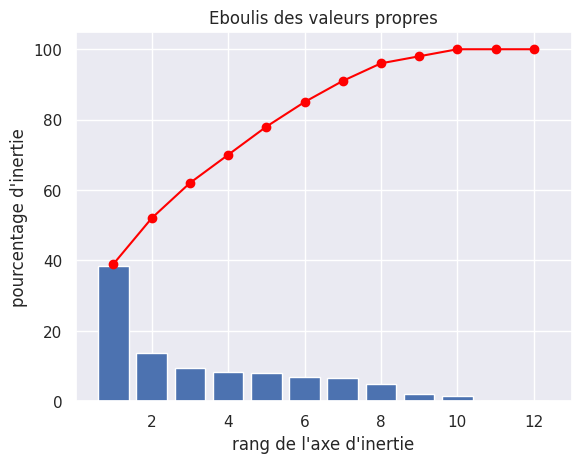

In [49]:
_ = pca.variance()

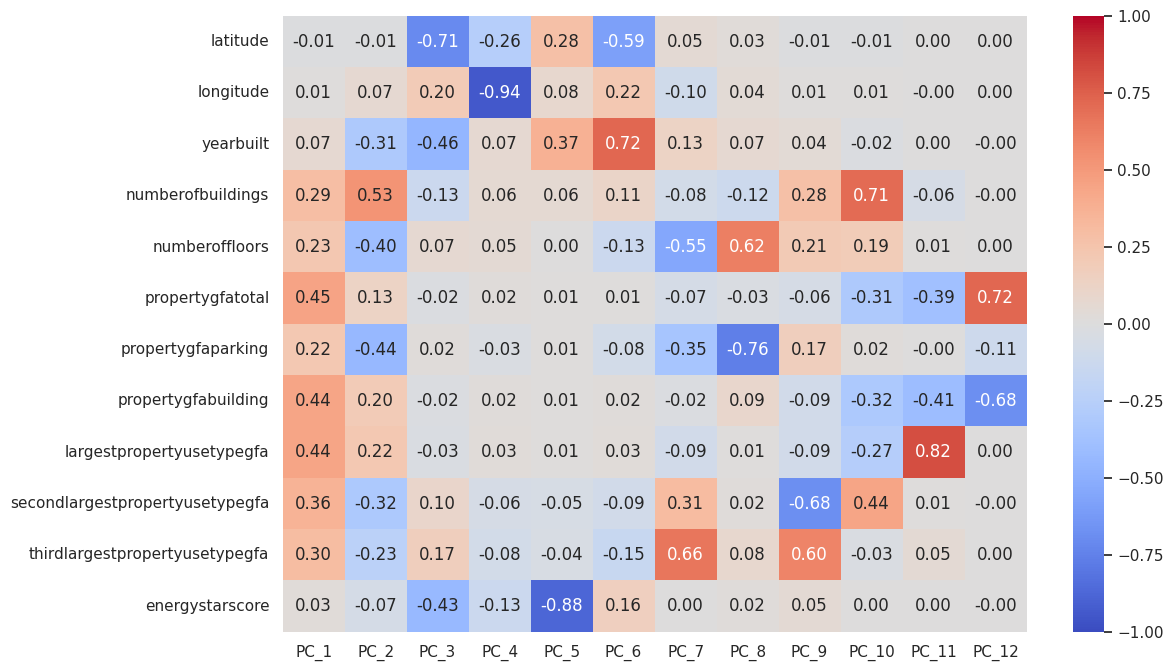

In [50]:
_ = pca.pcs()

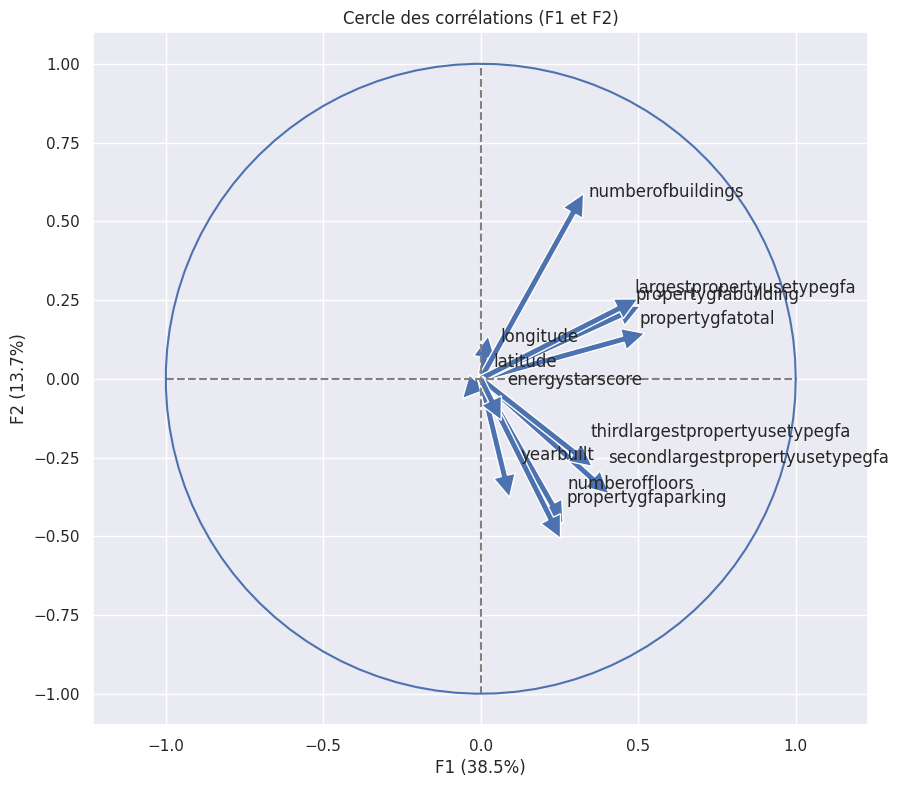

In [44]:
pca.correlation_graph([0, 1])

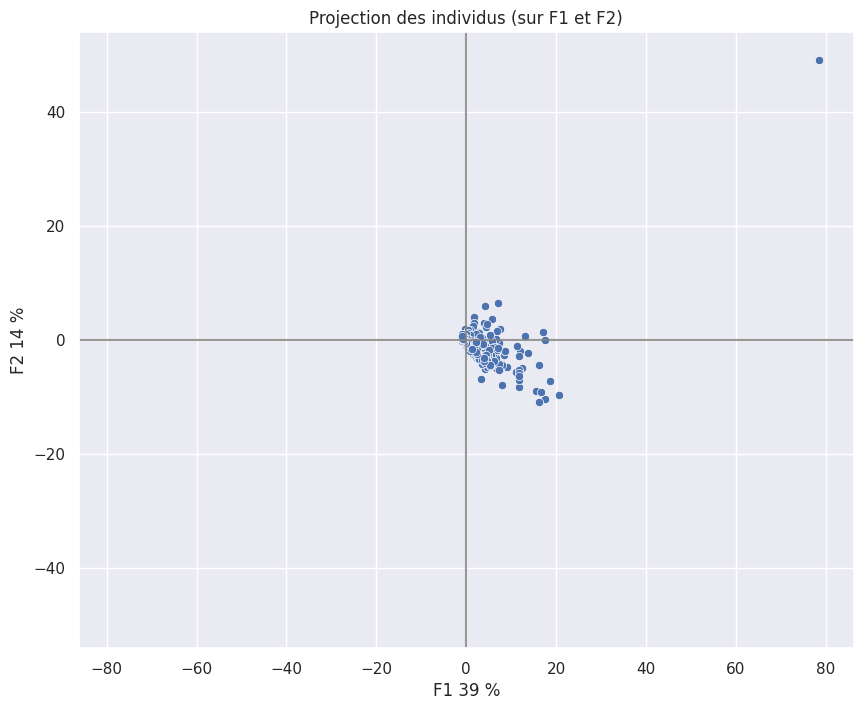

In [45]:
pca.factorial_planes([0, 1])

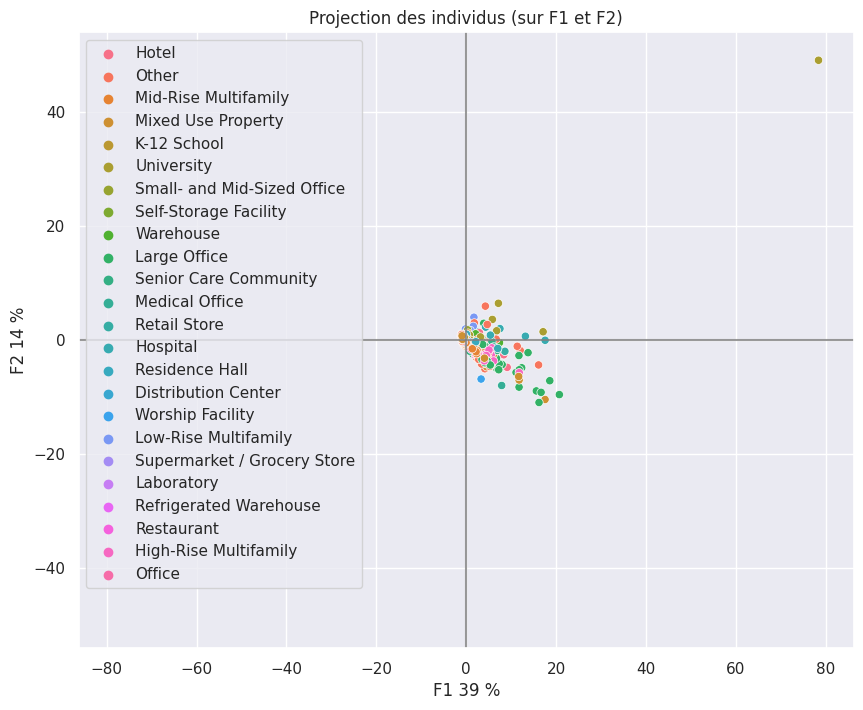

In [46]:
pca.factorial_planes([0, 1], clusters="primarypropertytype")

In [47]:
pca.factorial_planes([0, 1, 2])

In [48]:
pca.factorial_planes([0, 1, 2], clusters="primarypropertytype")